<a href="https://colab.research.google.com/github/felipeoprj/Projetos/blob/main/MVP_AEPD_felipe_pereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Analise de Dados e Boas Práticas - Felipe de Oliveira Pereira**

##**Definição do problema:**
Neste notebook iremos realizar toda a etapa de pre-processamento e analise dos dados para serem usados em um modelo de Machine Learning de aprendizado supervisionado para resolver um problema de classificação.

Esta base de dados contém informações sobre diagnósticos de tipos de tumores divididos entre malignos e benignos de 569 pacientes, onde cada registro representa exames de um paciente diferente. De acordo com determinadas características (Features) vindas destes exames, vamos prever se são características de um tumor maligno (Target = 0)  ou não (Target = 1). Iremos treinar o modelo para diagnosticar com maior acurácia possível baseado em dados históricos. Faremos todas as manipulações necessárias para chegar no modelo ideal.

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995


## **Pré-processamento de dados**

Nesta etapa faremos os tratamentos iniciais necessários para melhor utilizaçãos dos dados para modelos de Machine Learning.


###Imports Necessários

In [17]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
import matplotlib.pyplot as plt
import seaborn as sns # adicionando a importação do seaborn
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada

###Carga do dataset


In [18]:
# Importando dataset
from sklearn.datasets import load_breast_cancer

# Carregando dataset
dataset = load_breast_cancer()

# Tranformando a base de dados em um DataFrame

cancer=pd.DataFrame(data=dataset.data, columns=dataset.feature_names) # convertendo para dataframe

cancer['Class']=dataset.target # Adicionando a nossa Target

# Mostra as primeiras linhas do dataset
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Tratamento de Missings

Conforme abaixo, este dataset não tem campos nulos, não sendo necessário um tratamento para este cenário. E também não posso considerar valores zerados como nulos pois são resultados de exames e um resultado zerado pode representar distorcer uma informação importante para a analise do diagnóstico do paciente.

In [19]:
# verificando nulls no dataset
cancer.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


<Axes: >

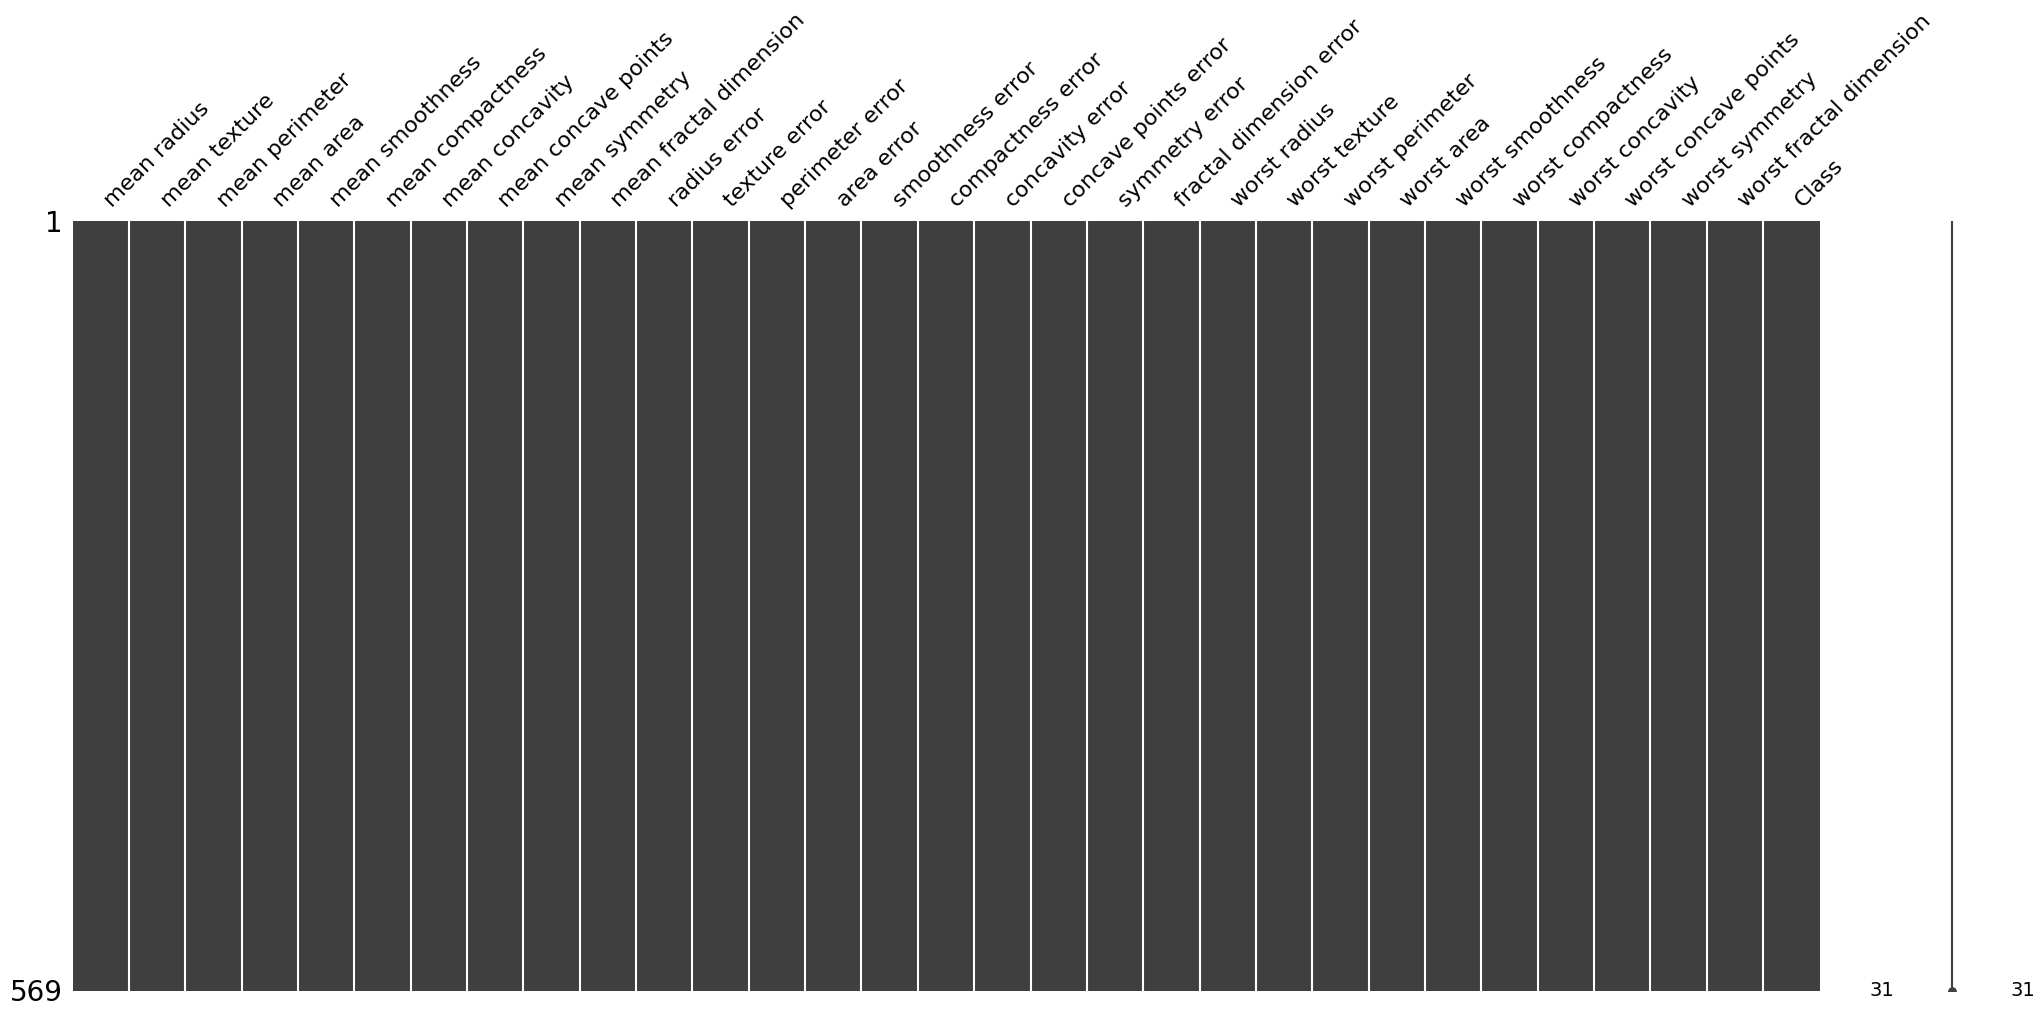

In [20]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(cancer)

Não foi necessário aplicar one hot encoding pois os rotulos ja estão tratados no dataset como valores numericos.

###Separação do dataset em conjunto de treino e testes com holdout

Foi utilizado uma proporção de 20% da base para teste e 80% para treino conforme sugerido durante o conteúdo do curso.


In [21]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = cancer.values
X = array[:,0:30]
y = array[:,30]
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

### Feature selection:

 Foi escolhido o modelo de Seleção Univariada (SelectKBest) pois, é o que melhor se comporta quando os atributos são numéricos e a saída é categórica.

In [22]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", cancer.columns[0:30])

# Exibe as pontuações de cada atributos e os 10 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=cancer.columns[0:30]))

# Separando em base de treino e testes com atributos selecionados

X_train, X_test, y_train, y_test = train_test_split(features, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação


Número original de atributos: 30

Número reduzido de atributos: 10

Atributos Originais: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Scores dos Atributos Originais: [6.470e+02 1.181e+02 6.972e+02 5.731e+02 8.365e+01 3.132e+02 5.338e+02
 8.617e+02 6.953e+01 9.346e-02 2.688e+02 3.909e-02 2.539e+02 2.437e+02
 2.558e+00 5.325e+01 3.901e+01 1.133e+02 2.412e-02 3.468e+00 8.608e+02
 1.


## **Analise dos dados**

Nesta etapa exploraremos algumas características do dataset, buscando encontrar algum padrão nos dados para que o apredizado supervisionado seja o mais eficiente possível. Além disso, adicionalmente, testaremos alguns modelos para entender a eficiencia dos mesmos perante o dataset tratado.

### Proporção Target

Esta etapa verifica se existe alguma distorção da proporção de rotulos entre os conjuntos de treino e teste, visando garantir uma menor probabilidade de haver underfitting ou overfitting. Conforme graficos abaixo, os rotulos estão igualmente distribuídos em ambas as bases.

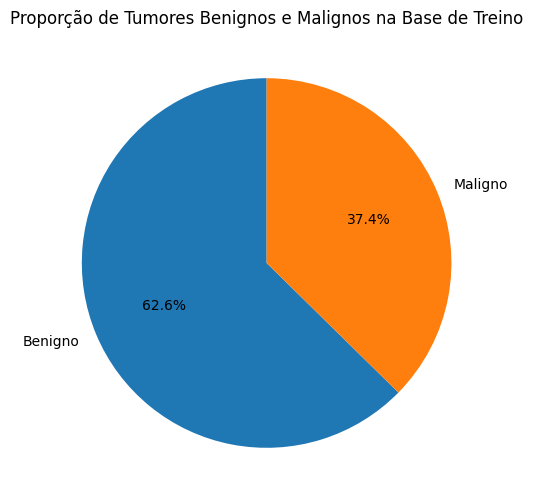

In [23]:
# criando um grafico de pizza

import matplotlib.pyplot as plt

# Contar a frequência de cada valor na coluna 'Class'
target_counts = y_train.astype(int)
target_counts = pd.Series(target_counts).value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Benigno', 'Maligno'], autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Tumores Benignos e Malignos na Base de Treino')
plt.show()


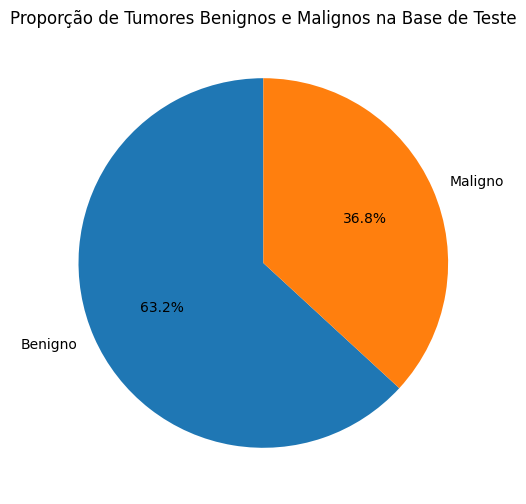

In [24]:
# criando um grafico de pizza

import matplotlib.pyplot as plt

# Contar a frequência de cada valor na coluna 'Class'
target_counts = y_test.astype(int)
target_counts = pd.Series(target_counts).value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Benigno', 'Maligno'], autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Tumores Benignos e Malignos na Base de Teste')
plt.show()


### Atributos x Target

Esta etapa verifica se existe alguma relação entre os atributos definidos como mais relevantes na etapa de feature selection, e o seu resultado. E, conforme resultado abaixo, em via de regra quando maiores os valores desses atributos, maiores são as chances do tumor ser maligno.


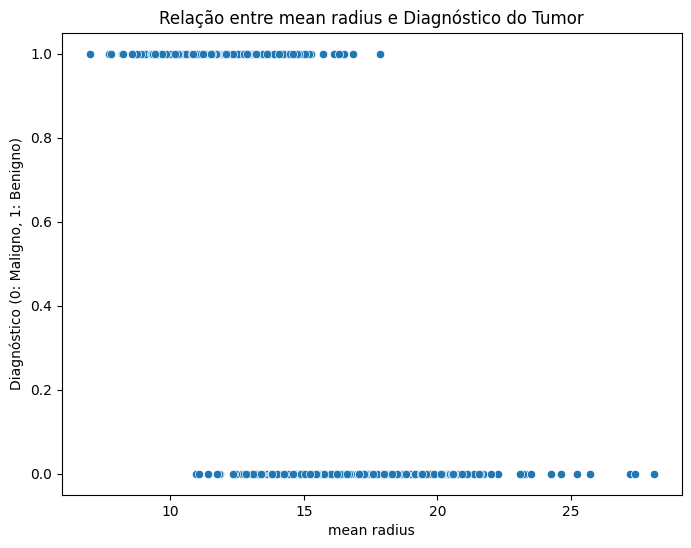

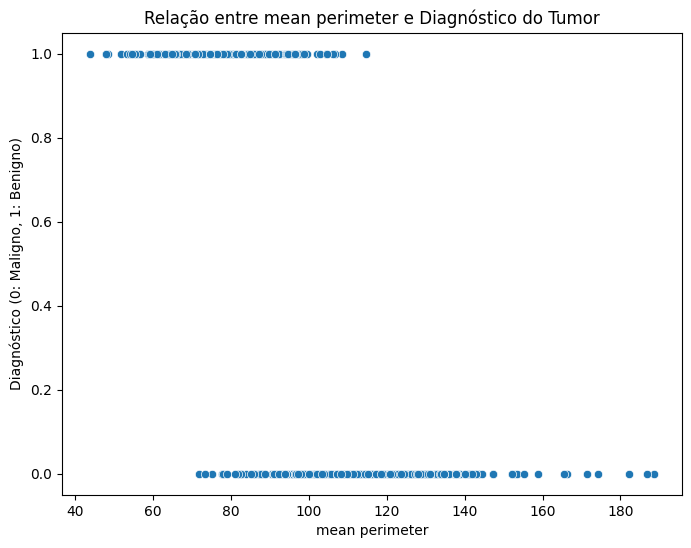

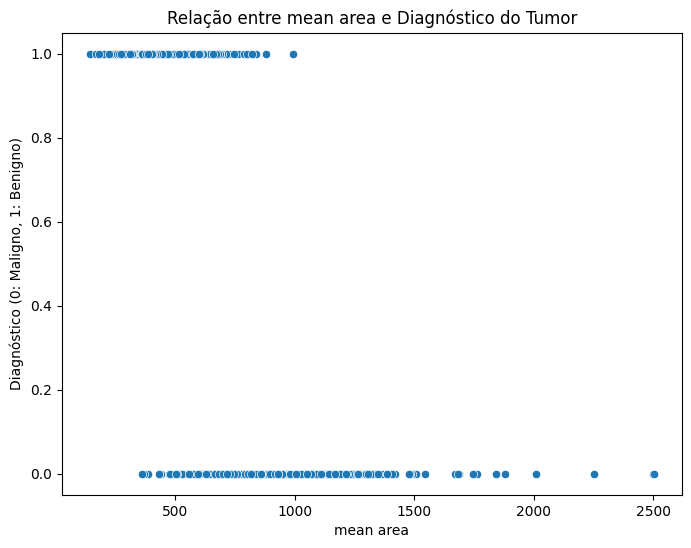

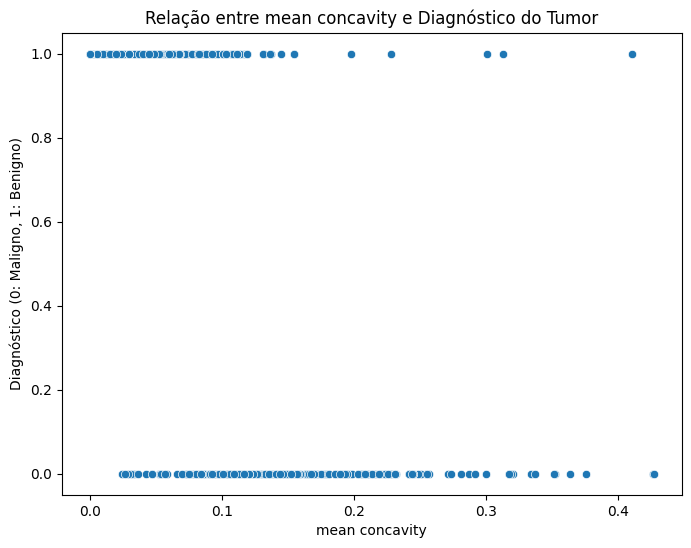

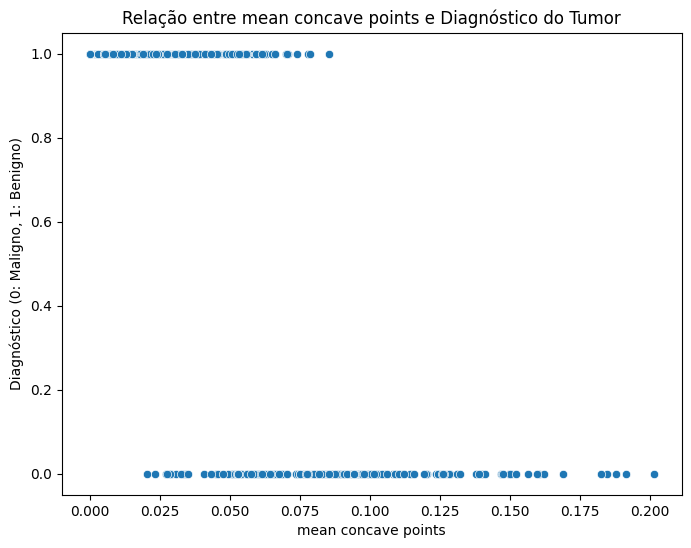

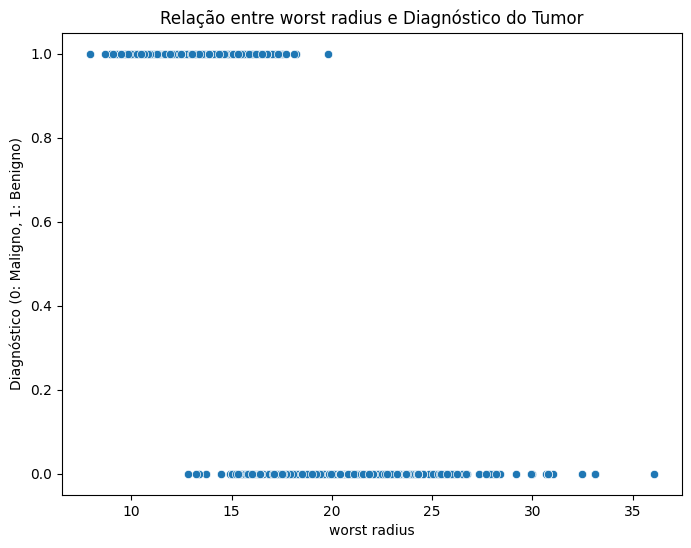

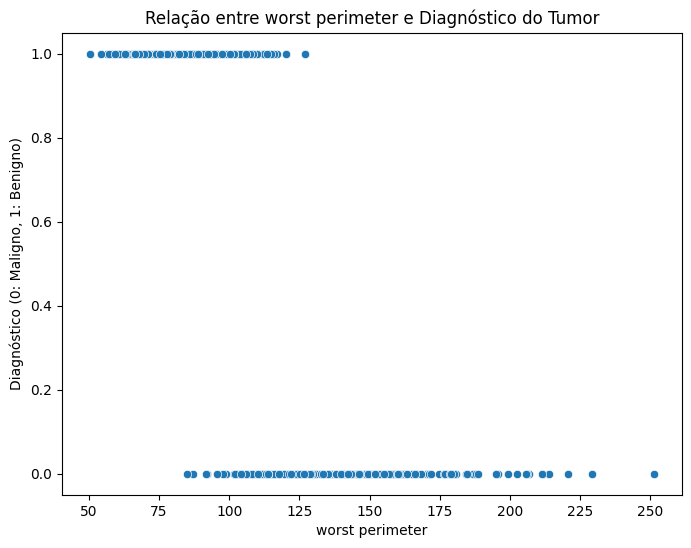

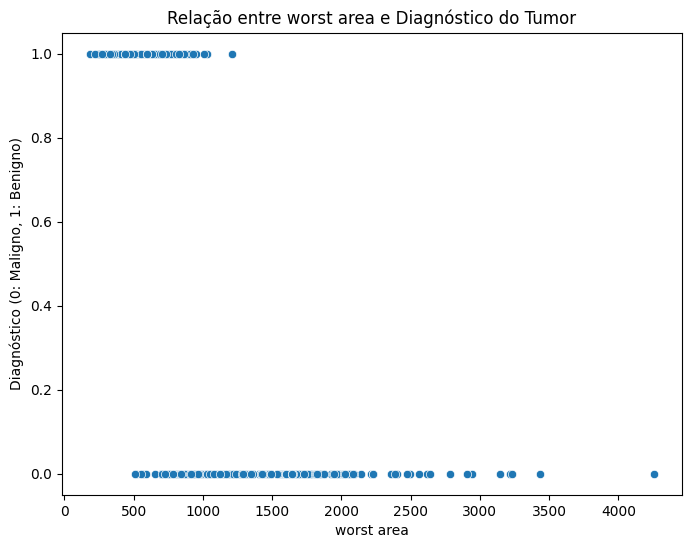

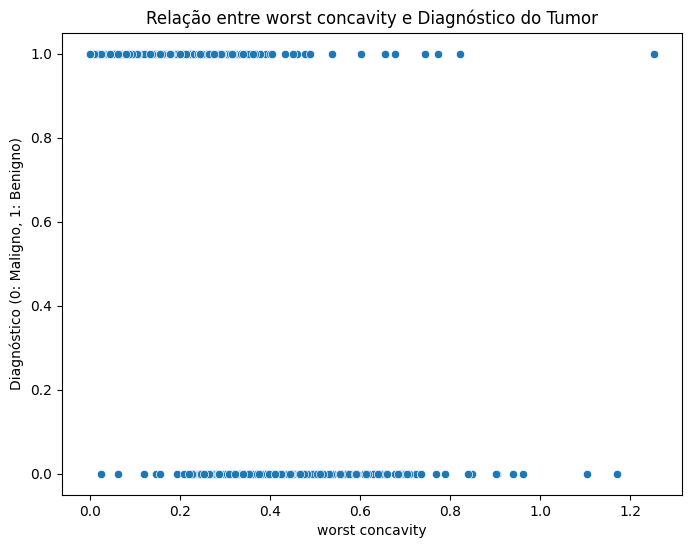

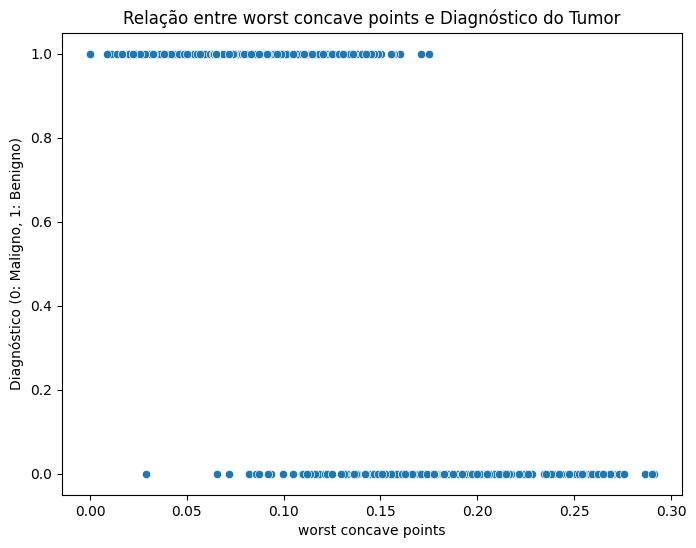

In [25]:
#grafico de relação dos atributos definidos na etapa de feature selection com o resultado target

# Criando um gráfico de dispersão para cada atributo selecionado
for feature in best_var.get_feature_names_out(input_features=cancer.columns[0:30]):
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=cancer[feature], y='Class', data=cancer)
  plt.title(f'Relação entre {feature} e Diagnóstico do Tumor')
  plt.xlabel(feature)
  plt.ylabel('Diagnóstico (0: Maligno, 1: Benigno)')
  plt.show()


### Criação e avaliação de modelos: linha base

Nesta fase avaliaremos a eficiencia dos modelos base perante dataset usando cross validation sem padronização ou normalização dos dados e usando a acrurácia como scoring para testagem.

LR: 0.940676 (0.024094)
KNN: 0.916425 (0.036884)
CART: 0.927536 (0.032442)
NB: 0.940725 (0.038325)
SVM: 0.905266 (0.038680)
Bagging: 0.938502 (0.032241)
RF: 0.951643 (0.030883)
ET: 0.951643 (0.027422)
Ada: 0.933865 (0.037077)
GB: 0.945072 (0.029860)
Voting: 0.945024 (0.014919)


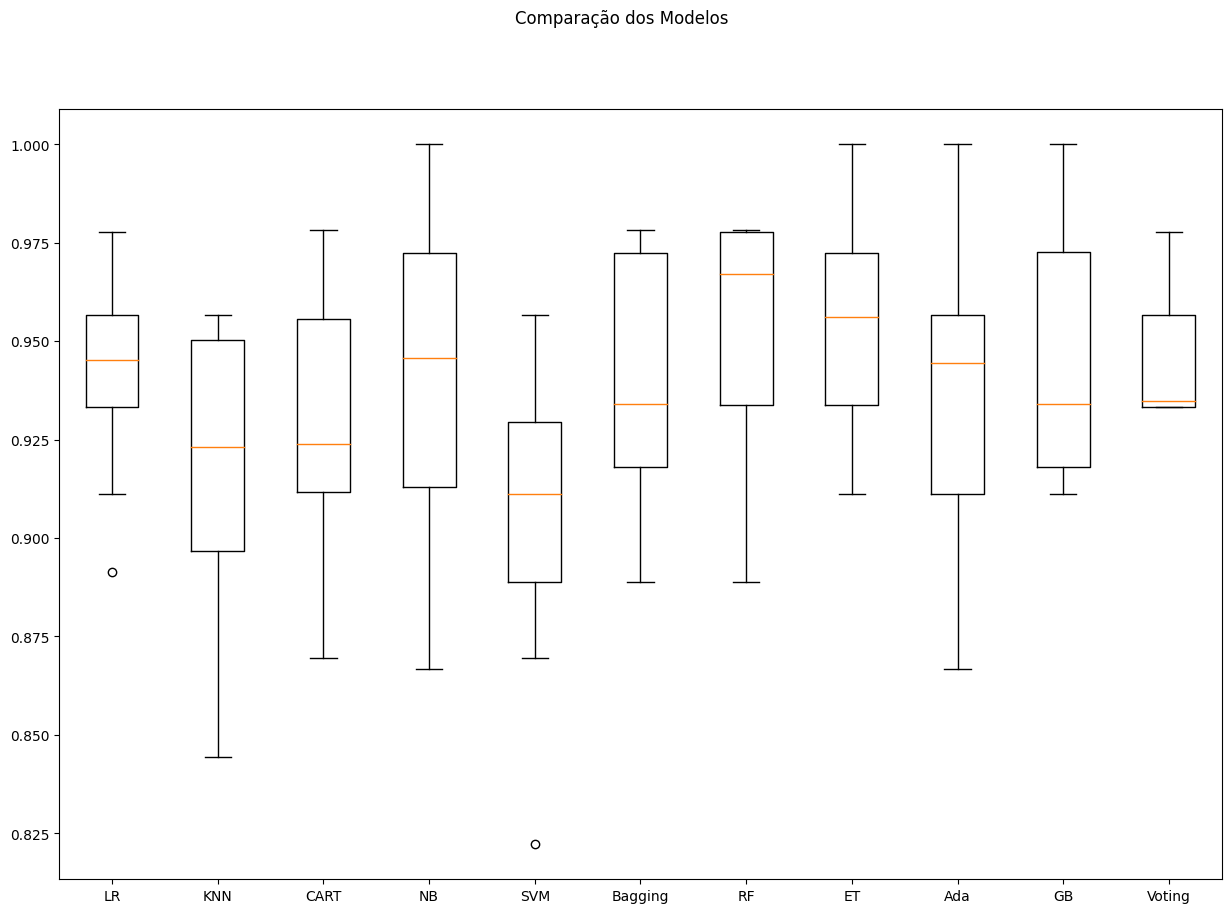

In [26]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Teste de modelos com dados normalizados e padronizados

O melhor modelo com base no cross validation abaixo, demonstrado no gráfico,  foi a Logistic Regression com padronização, provavelmente seguiriamos com esta configuração de modelo/tratamento de dados para a resolução do problema.

LR-orig: 0.941 (0.024)
KNN-orig: 0.916 (0.037)
CART-orig: 0.928 (0.032)
NB-orig: 0.941 (0.038)
SVM-orig: 0.905 (0.039)
Bag-orig: 0.939 (0.032)
RF-orig: 0.952 (0.031)
ET-orig: 0.952 (0.027)
Ada-orig: 0.934 (0.037)
GB-orig: 0.945 (0.030)
Vot-orig: 0.945 (0.015)
LR-padr: 0.960 (0.028)
KNN-padr: 0.943 (0.031)
CART-padr: 0.921 (0.029)
NB-padr: 0.952 (0.034)
SVM-padr: 0.954 (0.033)
Bag-padr: 0.943 (0.036)
RF-padr: 0.952 (0.024)
ET-padr: 0.958 (0.028)
Ada-padr: 0.934 (0.037)
GB-padr: 0.941 (0.029)
Vot-padr: 0.954 (0.032)
LR-norm: 0.943 (0.037)
KNN-norm: 0.945 (0.028)
CART-norm: 0.919 (0.033)
NB-norm: 0.952 (0.034)
SVM-norm: 0.949 (0.033)
Bag-norm: 0.949 (0.034)
RF-norm: 0.949 (0.037)
ET-norm: 0.956 (0.028)
Ada-norm: 0.934 (0.037)
GB-norm: 0.947 (0.033)
Vot-norm: 0.947 (0.031)


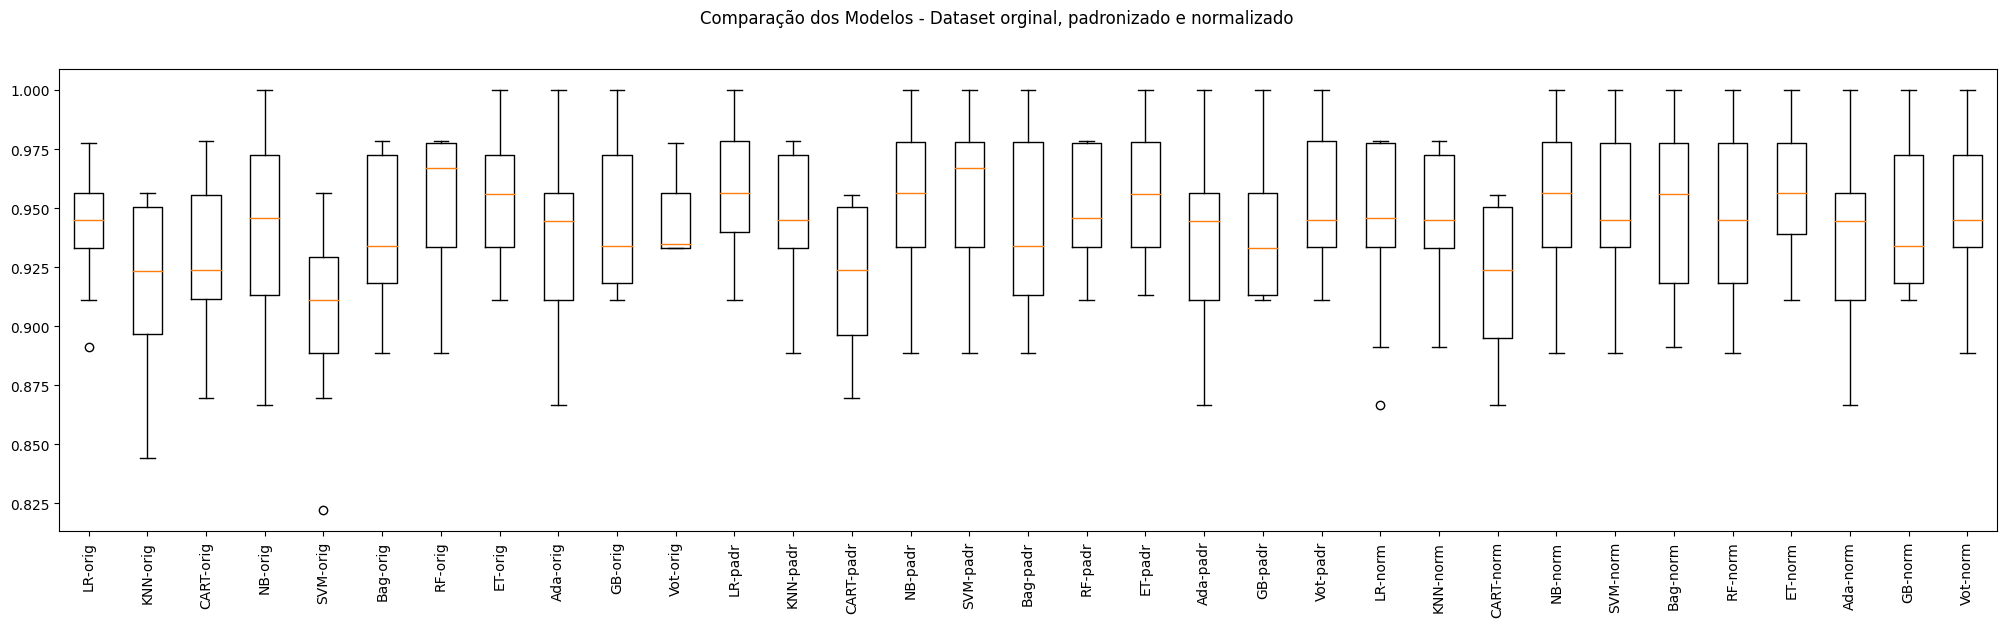

In [27]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Considerações da análise

Conforme análises desta etapa, não foram identificadas melhorias a serem feitas nos dados para melhor performance dos modelos. Logo, o que foi feito acima é o necessário para que pudessemos prosseguir para a produção do modelo posteriormente.